## Visualizing annotations from custom ObjectAnnotation react component 

Time take in minutes  24.25


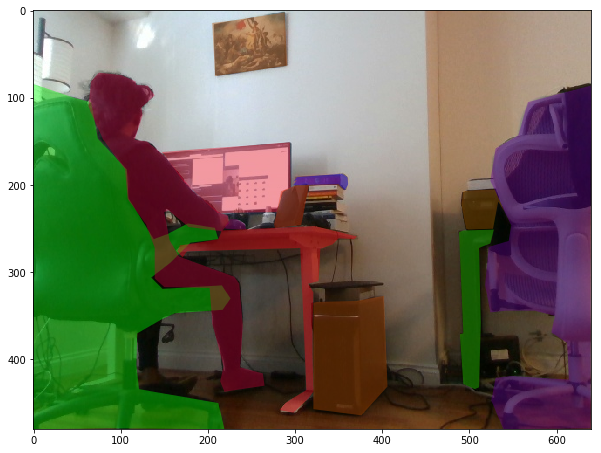

Time take in minutes  12.583333333333334


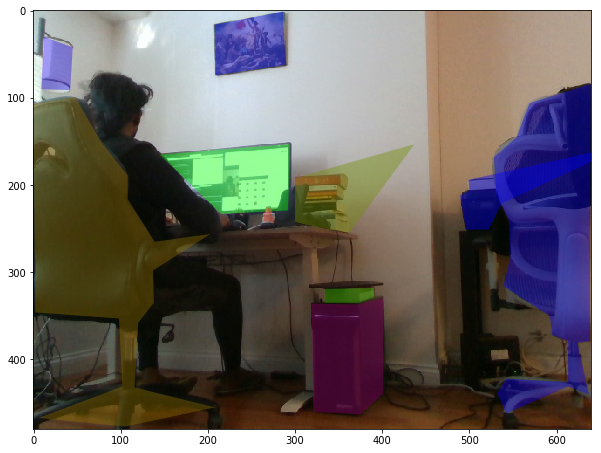

Time take in minutes  17.133333333333333


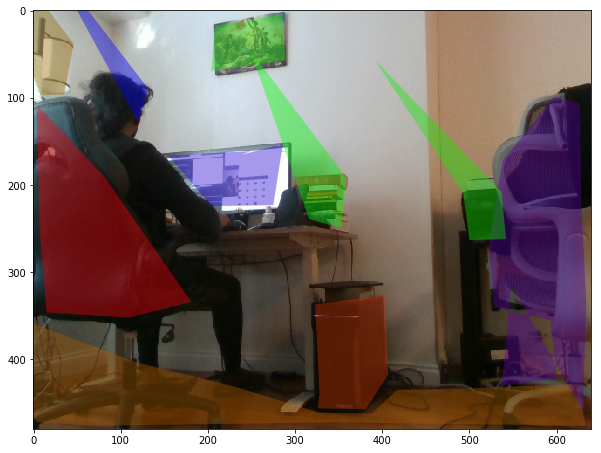

Time take in minutes  25.016666666666666


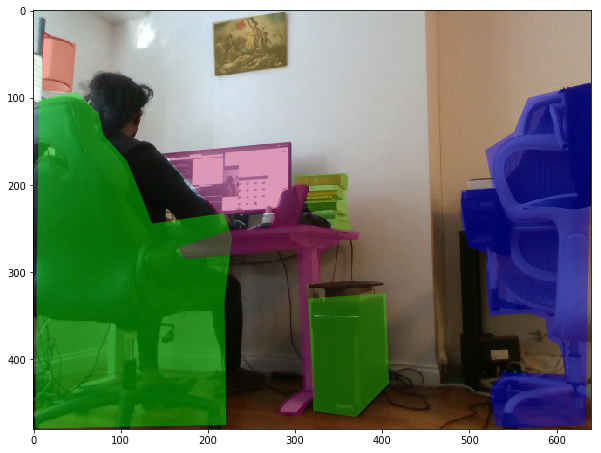

Time take in minutes  28.983333333333334


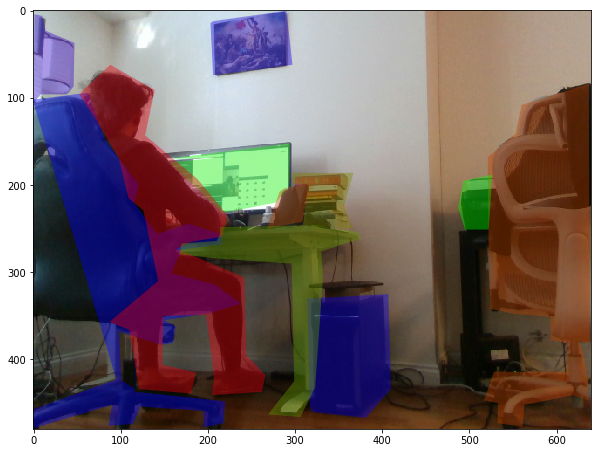

Time take in minutes  25.783333333333335


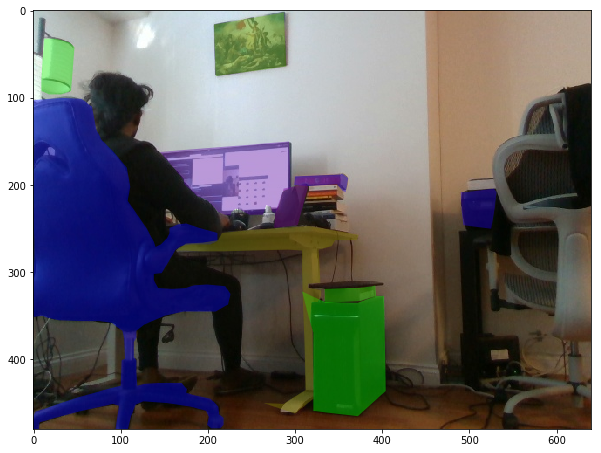

In [102]:
import base64
import io
import numpy as np
from PIL import Image
import cv2
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import requests
import urllib.request
from ast import literal_eval
from IPython.core.display import display, HTML
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

pd.set_option('max_colwidth', 300)
matplotlib.rcParams['figure.figsize'] = (20, 7.0)

display(HTML(
    """
    <style>
    .container { width:100% !important; }
    #notebook { letter-spacing: normal !important;; }
    .CodeMirror { font-family: monospace !important; }
    .cm-keyword { font-weight: bold !important; color: #008000 !important; }
    .cm-comment { font-style: italic !important; color: #408080 !important; }
    .cm-operator { font-weight: bold !important; color: #AA22FF !important; }
    .cm-number { color: #080 !important; }
    .cm-builtin { color: #008000 !important; }
    .cm-string { color: #BA2121 !important; }
    </style>
    """
))


def decodeAndImg(image_dat):
    image = base64.b64decode(str(image_dat))       
    img = Image.open(io.BytesIO(image))
    return img.convert('RGB')

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return Image.fromarray(image)

def get_points_nx2(pt):
    # pt is a list of dicts 
    xys = []
    for x in pt:
        xys.append([int(x['x']), int(x['y'])])
    return np.array(xys)

def get_points_xs_ys(pt):
    # pt is a list of dicts 
    xs = []
    ys = []
    for x in pt:
        xs.append(x['x'])
        ys.append(x['y'])
    return xs, ys


def displayResults(filename):
    # Load CSV of results 
    df = pd.read_csv(filename)
    for index, row in df.iterrows():
        print("Time take in minutes ", row['WorkTimeInSeconds']/60)
        img = url_to_image(row['Input.image_url'])
        data = literal_eval(row['Answer.data'])
        pts = data['points']  # dict with objectId as key, list of (x,y)
        properties = data['properties']  # dict with objectId as key, list as properties
        plt.figure(figsize=(10,10))
        axes = plt.gca()
        patches = []
        for oid in data['objectIds']:
            prop = properties[str(oid)]
            pt = pts[str(oid)]
            if len(pt) > 0:
                pt.append(pt[0]) # close the loop
            
            xys = get_points_nx2(pt)
            if xys.size > 0:
                patches.append(Polygon(xys))
        
        p = PatchCollection(patches, cmap=matplotlib.cm.brg, alpha=0.4)
        colors = 100 * np.random.rand(len(patches))
        p.set_array(np.array(colors))
        axes.add_collection(p)
        
        plt.imshow(img)
        plt.show()

displayResults('mc_new/locobot/notebooks/turk_annotations/Batch_4275461_batch_results.csv')